# Image interpolation in OpenCV

This content supports this article: https://medium.com/@zahid-parvez/image-interpolation-in-opencv-5a3b96111872

Some form of image interpolation is always taking place when manipulating digital images - whether it's resizing them to increase or decrease the total number of pixels, correcting for lens distortion, changing perspective, or rotating an image.

Rephrase Interpolation is an approximation that may result in image degradation each time it's performed. The image may vary significantly depending on the interpolation algorithm used.

In this post, i will provide an overview of the diffrent interpolation algorithm that OpenCV uses


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def DisplayImageComparison1x3(original, augmented, augmented1, augmentedTitle = "Augmented", augmentedTitle1 = "Augmented"):
    """This function shows a comparason of orginal vs augmented image"""
    fig, axes = plt.subplots(nrows=1, ncols=3)
    ax = axes.ravel()
    ax[0].imshow(original)
    ax[0].set_title("Original")
    ax[1].imshow(augmented)
    ax[1].set_title(augmentedTitle)
    ax[2].imshow(augmented1)
    ax[2].set_title(augmentedTitle1)
    plt.tight_layout()
    plt.show()
    
def ReadImageRGB(pathToImage):
    return cv2.cvtColor(cv2.imread(pathToImage), cv2.COLOR_BGR2RGB)

def DisplayImage(image):
    plt.imshow(image)
    plt.title("Image")
    plt.show()
    
def ScaleImageByRatio(image, xScale, yScale, interpolationMethod = cv2.INTER_LINEAR):
    # Scale the image using a scaling factor
    # image - input image as a matrix
    # xScale - scale factor for the x axis (width) 
    # yScale - scale factor for the y axis (height)
    # interpolationMethod - interpolation method used
    
    return cv2.resize(image,None,fx=xScale, fy=yScale, interpolation = interpolationMethod)

In [2]:
original_im = ReadImageRGB('original.png')
original_px_im = ReadImageRGB('original-pixel.png')

## Nearest-neighbor interpolation

The nearest neighbour algorithm selects the value of the nearest pixel and does not interpolate between values from other neighbouring pixels. This algorithm does not create any pixel values that doesn’t exist on the original image. This type of interpolation is ideal for scaling images where precise pixel borders must be maintained (such when working with pixel art).

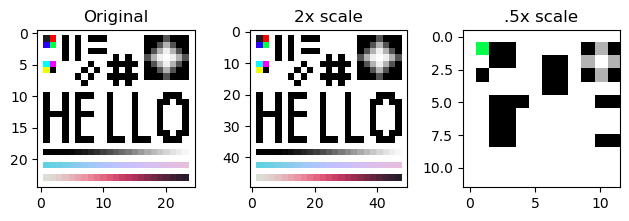

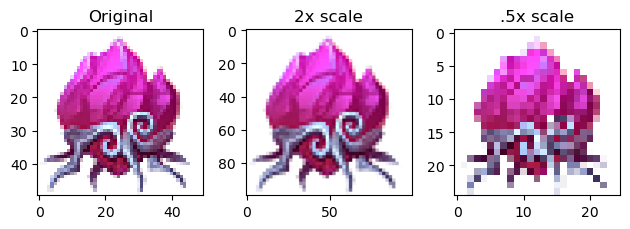

In [3]:
DisplayImageComparison1x3(original_im,
                          ScaleImageByRatio(original_im,2,2,cv2.INTER_NEAREST),
                          ScaleImageByRatio(original_im,.5,.5,cv2.INTER_NEAREST),
                          "2x scale",
                          ".5x scale")

DisplayImageComparison1x3(original_px_im,
                          ScaleImageByRatio(original_px_im,2,2,cv2.INTER_NEAREST),
                          ScaleImageByRatio(original_px_im,.5,.5,cv2.INTER_NEAREST),
                          "2x scale",
                          ".5x scale")

## Bilinear interpolation

Bilinear interpolation is an algorithm that applies linear interpolation between pixel values in the x and y directions. As images are represented as a matrix, this is implemented as a two-step process; firstly pixels are interpolated in the x direction, then the y direction. This algorithm will generate new pixel values (that doesnt exist on the original) as the pixel values are calculated based on weighted averages of the surrounding pixels.

By default, OpenCV applies this interpolation algorithm unless oterwise defined. This is a good general purpose interpolation algrothim.

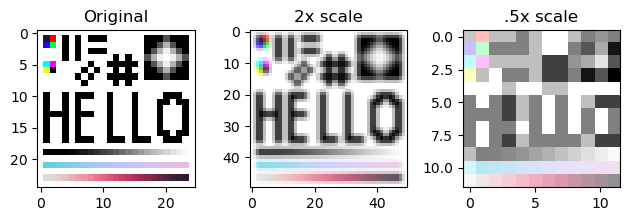

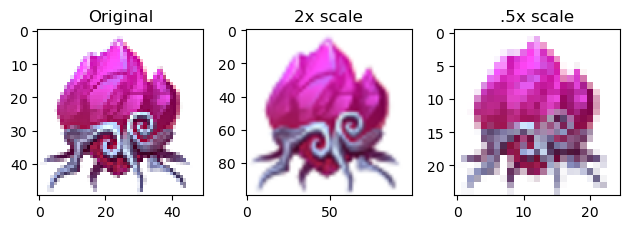

In [4]:
DisplayImageComparison1x3(original_im,
                          ScaleImageByRatio(original_im,2,2,cv2.INTER_LINEAR),
                          ScaleImageByRatio(original_im,.5,.5,cv2.INTER_LINEAR),
                          "2x scale",
                          ".5x scale")

DisplayImageComparison1x3(original_px_im,
                          ScaleImageByRatio(original_px_im,2,2,cv2.INTER_LINEAR),
                          ScaleImageByRatio(original_px_im,.5,.5,cv2.INTER_LINEAR),
                          "2x scale",
                          ".5x scale")

## Pixel area relation resampling

This algorithm yields similar results to the Nearest-neighbor algorithm. According to OpenCV's documentation, it preforms resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire'-free results. 

As we can see in the compressions below, when upscaling, it had the same results as the nearest-neighbour algorithm, however, downscaling resulted in output similar to the bilinear algorithm.

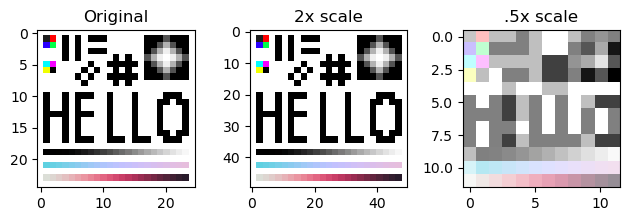

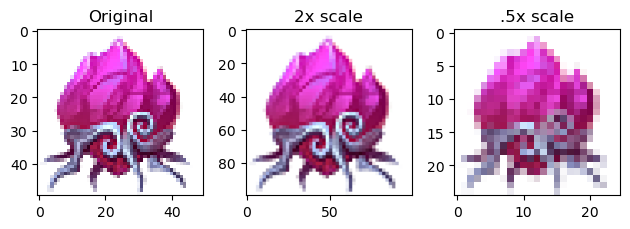

In [5]:
DisplayImageComparison1x3(original_im,
                          ScaleImageByRatio(original_im,2,2,cv2.INTER_AREA),
                          ScaleImageByRatio(original_im,.5,.5,cv2.INTER_AREA),
                          "2x scale",
                          ".5x scale")

DisplayImageComparison1x3(original_px_im,
                          ScaleImageByRatio(original_px_im,2,2,cv2.INTER_AREA),
                          ScaleImageByRatio(original_px_im,.5,.5,cv2.INTER_AREA),
                          "2x scale",
                          ".5x scale")

## Bicubic interpolation

This method of resizing uses bicubic interpolation. It works by averaging the weights for each pixel adjacent to the current image location, then using that value as a new pixel in the image. This method is similar to the bilinear algorithm however instead of linear interpolation, the weighting favours the values closer to the source pixel (imagine a S curve between 2 points instead of a line). This method would result in a 'sharper' output compared to bilinear interpolation

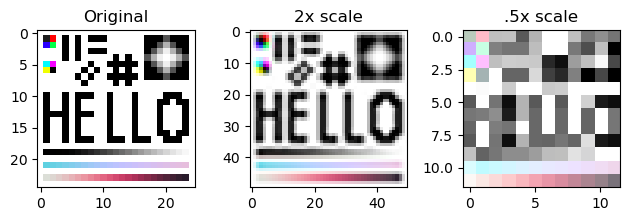

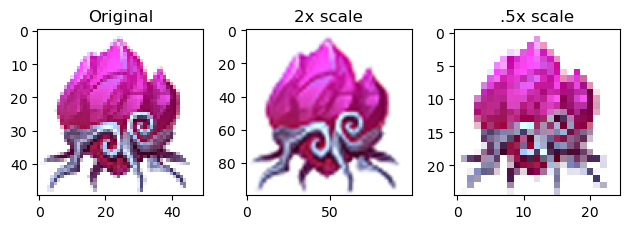

In [6]:
DisplayImageComparison1x3(original_im,
                          ScaleImageByRatio(original_im,2,2,cv2.INTER_CUBIC),
                          ScaleImageByRatio(original_im,.5,.5,cv2.INTER_CUBIC),
                          "2x scale",
                          ".5x scale")

DisplayImageComparison1x3(original_px_im,
                          ScaleImageByRatio(original_px_im,2,2,cv2.INTER_CUBIC),
                          ScaleImageByRatio(original_px_im,.5,.5,cv2.INTER_CUBIC),
                          "2x scale",
                          ".5x scale")

## Lanczos interpolation

Uses Lanczos resampling over 8×8 pixel neighborhood and is quiet slow and resource-intensive. This is best used for images containing lots of intricate details (such as text)

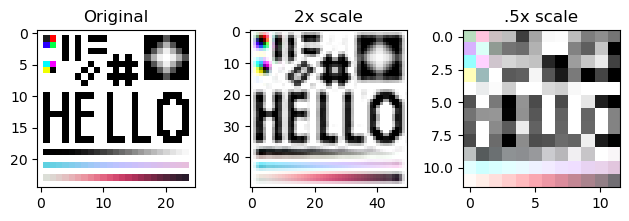

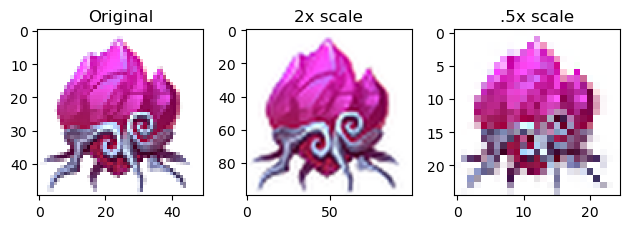

In [7]:
DisplayImageComparison1x3(original_im,
                          ScaleImageByRatio(original_im,2,2,cv2.INTER_LANCZOS4),
                          ScaleImageByRatio(original_im,.5,.5,cv2.INTER_LANCZOS4),
                          "2x scale",
                          ".5x scale")

DisplayImageComparison1x3(original_px_im,
                          ScaleImageByRatio(original_px_im,2,2,cv2.INTER_LANCZOS4),
                          ScaleImageByRatio(original_px_im,.5,.5,cv2.INTER_LANCZOS4),
                          "2x scale",
                          ".5x scale")